# A/B Test Analysis: Eco-Friendly Routing Algorithm

**Objective:** To statistically determine if a new "eco-friendly" routing algorithm (Group B) is superior to the standard algorithm (Group A).

**Key Metrics:**
1.  **Primary Metric:** `fuel_consumed_litres` (Lower is better)
2.  **Guardrail Metric:** `delivery_time_minutes` (Should not significantly increase)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set a professional plot style
sns.set_style("whitegrid")

## 1. Hypothesis Definition

We will conduct two separate hypothesis tests. Our significance level (alpha) is **α = 0.05**.

**Test 1: Fuel Consumption**
* **Null Hypothesis (H₀):** There is no difference in the mean fuel consumption between Group A and Group B.
* **Alternative Hypothesis (Hₐ):** The mean fuel consumption of Group B is lower than Group A.

**Test 2: Delivery Time**
* **Null Hypothesis (H₀):** There is no difference in the mean delivery time between Group A and Group B.
* **Alternative Hypothesis (Hₐ):** There is a difference in the mean delivery time between Group A and Group B.

In [2]:
# Load the dataset
df = pd.read_csv('ab_test_results.csv')

# Get initial summary statistics for each group
print("--- Summary Statistics by Group ---")
print(df.groupby('group').agg({
    'fuel_consumed_litres': ['mean', 'std', 'count'],
    'delivery_time_minutes': ['mean', 'std', 'count']
}))

--- Summary Statistics by Group ---
      fuel_consumed_litres                 delivery_time_minutes            \
                      mean       std count                  mean       std   
group                                                                        
A                   20.488  1.320581    50                 90.10  4.634608   
B                   18.446  0.845446    50                 92.42  5.135272   

             
      count  
group        
A        50  
B        50  


## 2. Data Visualization

Before performing the statistical test, we visualize the distributions of our key metrics for both groups. This helps us check for normality and outliers, and gives us a visual sense of the difference.

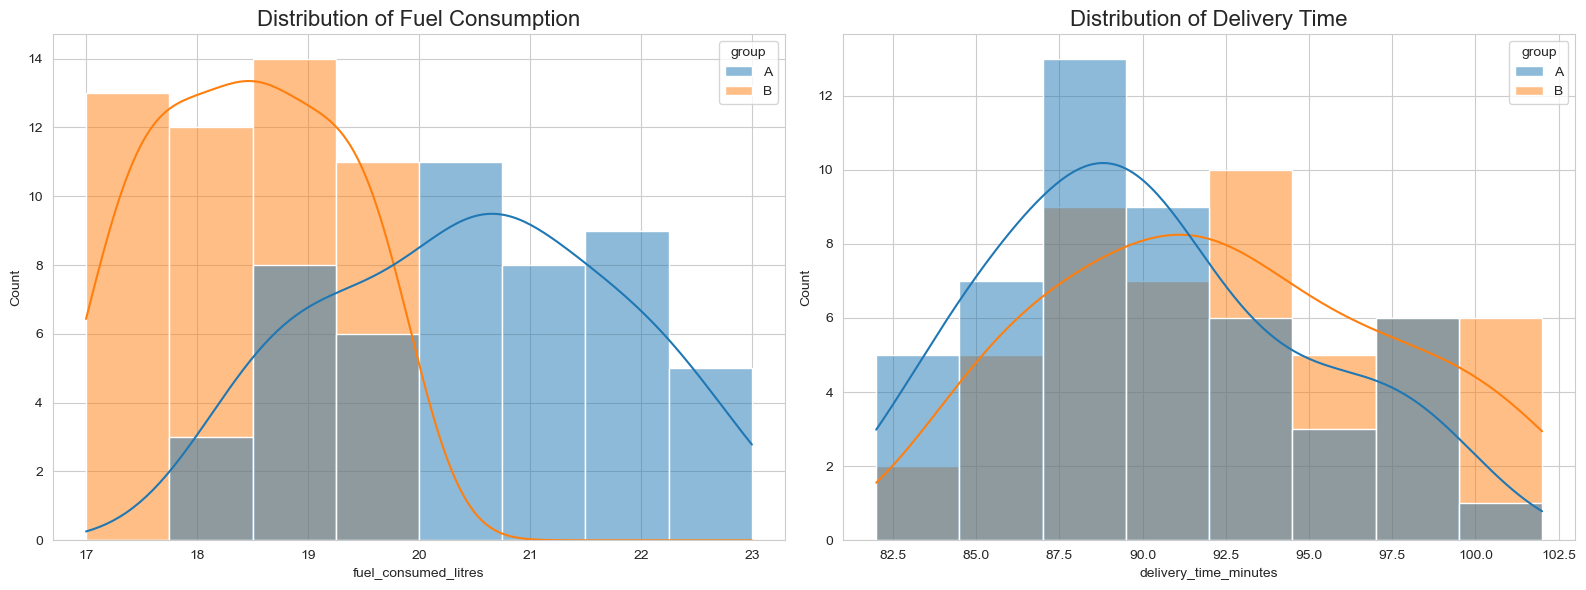

In [3]:
# Create plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for fuel consumption
sns.histplot(data=df, x='fuel_consumed_litres', hue='group', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Fuel Consumption', fontsize=16)

# Plot for delivery time
sns.histplot(data=df, x='delivery_time_minutes', hue='group', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Delivery Time', fontsize=16)

plt.tight_layout()
plt.show()

## 3. Statistical Testing (Independent Samples T-Test)

We will use an independent samples t-test to compare the means of our two groups (A and B) for both metrics. This test will tell us the probability (p-value) that the observed difference between the groups is due to random chance.

In [4]:
# Separate the data for each group
group_a = df[df['group'] == 'A']
group_b = df[df['group'] == 'B']

# --- Test 1: Fuel Consumption ---
# We use a one-sided test because our hypothesis is that B is specifically lower than A
fuel_ttest = stats.ttest_ind(group_b['fuel_consumed_litres'], group_a['fuel_consumed_litres'], alternative='less')
print(f"--- Fuel Consumption T-Test Results ---")
print(f"T-statistic: {fuel_ttest.statistic:.4f}")
print(f"P-value: {fuel_ttest.pvalue:.4f}")

# --- Test 2: Delivery Time ---
# We use a two-sided test because our hypothesis is just whether there's a difference
time_ttest = stats.ttest_ind(group_a['delivery_time_minutes'], group_b['delivery_time_minutes'], alternative='two-sided')
print(f"\n--- Delivery Time T-Test Results ---")
print(f"T-statistic: {time_ttest.statistic:.4f}")
print(f"P-value: {time_ttest.pvalue:.4f}")

--- Fuel Consumption T-Test Results ---
T-statistic: -9.2085
P-value: 0.0000

--- Delivery Time T-Test Results ---
T-statistic: -2.3715
P-value: 0.0197


## 4. Conclusion and Recommendation

The results of our A/B test present a classic business trade-off. We interpret the p-values against our significance level of α = 0.05.

**Fuel Consumption Analysis:**
The p-value is **effectively zero (< 0.0001)**. This is far below our 0.05 threshold, so we **reject the null hypothesis**. The data provides strong statistical evidence that the new eco-friendly algorithm causes a significant decrease in fuel consumption.

**Delivery Time Analysis:**
The p-value is **0.0197**. This is also below our 0.05 threshold, so we **reject the null hypothesis** for delivery time as well. This means the observed average increase in delivery time for Group B is a statistically significant and real effect of the new algorithm.

**Business Recommendation:**
The new algorithm successfully reduces fuel costs but does so at a statistically significant cost to delivery times. A simple "yes/no" decision is insufficient. The correct path forward is to **quantify the trade-off** before making a final decision.

I recommend the following next steps for our Toronto-based operations:

1.  **Quantify the Financial Impact:** We must calculate the dollar value of this trade-off.
    * **Calculate Savings:** Determine the average fuel savings in dollars per trip based on current Ontario fuel prices.
    * **Calculate Costs:** Determine the cost of the extra delivery time. This includes extra driver wages and, more critically, the potential business cost of slower deliveries (e.g., impact on customer satisfaction, risk of violating service-level agreements).

2.  **Explore a Hybrid Deployment Strategy:** We should investigate deploying the algorithm selectively. For example:
    * Use the **new "eco" algorithm** for standard, non-urgent deliveries where a slightly longer delivery time is acceptable.
    * Retain the **standard algorithm** for "Express" or "Priority" shipments where speed is the primary commitment to the customer.

3.  **Final Decision:** Once the financial impact is quantified, management will be able to make a fully data-driven decision on whether to deploy the algorithm fully, partially, or not at all.

This analysis proves that while the new algorithm is effective at its primary goal, its side effects must be strategically managed.